<a href="https://www.kaggle.com/code/eavprog/abscur-tovar-sharp?scriptVersionId=163979652" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Настоящий файл устарел!!!

Новая версия находится по адресу https://www.kaggle.com/code/eavprog/abscur2

---

# Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)

ДОБРО ПОЖАЛОВАТЬ НА СТРАНИЦУ РЕЙТИНГОВ ТОВАРОВ МОСКОВСКОЙ БИРЖИ ПО КОЭФФИЦИЕНТУ ШАРПА: АНАЛИЗ ЭФФЕКТИВНОСТИ ИНВЕСТИЦИЙ

Мы рады представить вам страницу с рейтингами товаров Московской биржи по коэффициенту Шарпа, которая предоставляет уникальную возможность оценить эффективность инвестиций в различные товары. Наша страница обеспечивает обширный анализ и классификацию товаров на основе их доходности и риска.

В общей сложности на странице представлены 9 товаров, включающих золото, серебро, нефть, газ, платину и другие. Мы предлагаем вам ознакомиться с рейтингами на различные временные промежутки, начиная от месяца и до пяти лет. Такой широкий спектр временных интервалов позволяет вам получить полное представление о доходности товаров на протяжении различных периодов.

На странице вы найдете столбчатые диаграммы с коэффициентами Шарпа для долларового и абсолютного курса товаров, отсортированными по убыванию. Горизонтальная ось диаграмм содержит коды товаров, что обеспечивает удобную идентификацию каждого товара на графике. Дополнительно, мы предоставляем вторую диаграмму, которая отображает абсолютный курс товаров.

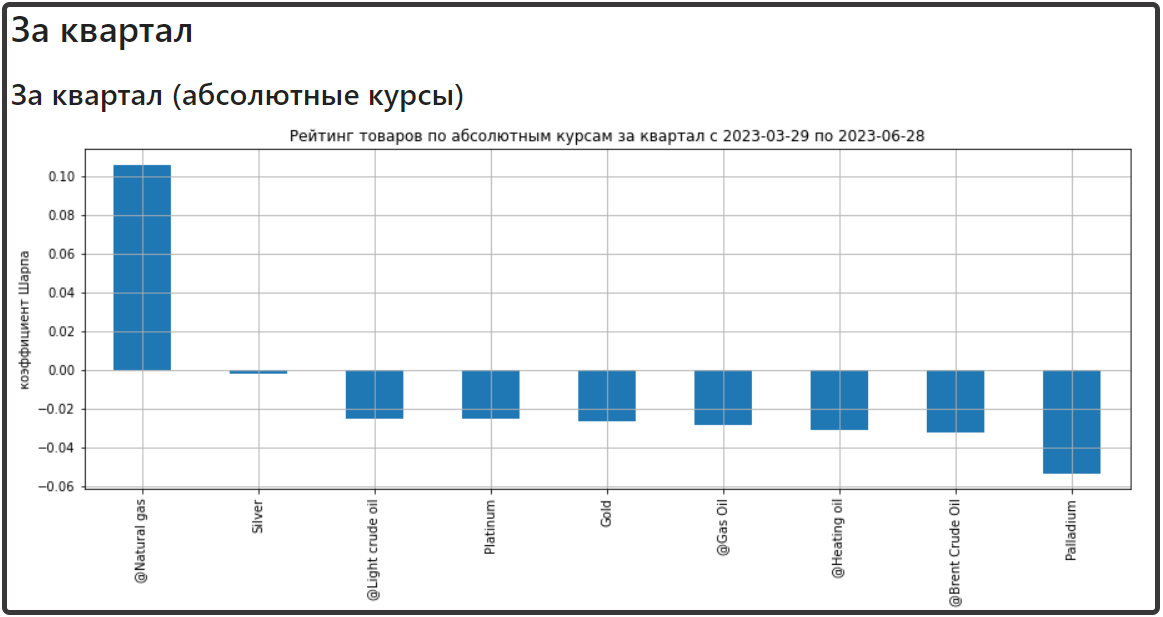

Коэффициент Шарпа считается как отношение средней дневной доходнсти к стандартному отклонению этой средней дневной доходности.

$$
coefSharp = \frac{mean(\frac{A_{i+1}-A_i}{A_i},i=start...end)}{std(\frac{A_{i+1}-A_i}{A_i},i=start...end)}
$$

Под графиками находится таблица, содержащая информацию о самых выгодных и наименее выгодных товарах, основанную на высоком и низком значении коэффициента Шарпа соответственно. В таблице указаны коды товаров, категории и значения коэффициента Шарпа для каждого товара. Также, мы предоставляем ссылки на страницу с графиком истории абсолютного и долларового курса каждого товара, чтобы вы могли получить более подробную информацию.

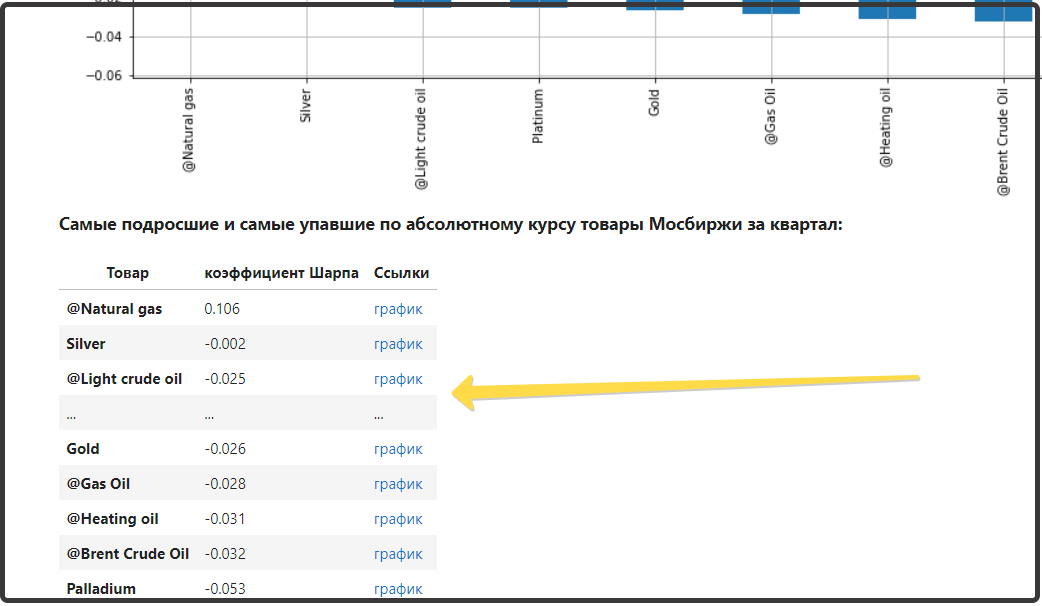

Для вашего удобства мы разместили ссылки на разделы проекта, соответствующие каждому временному промежутку, чтобы вы могли легко перейти к интересующей вас информации. Перемещение между товарами также возможно благодаря правому боковому меню, которое обеспечивает быстрый доступ к каждому товару.

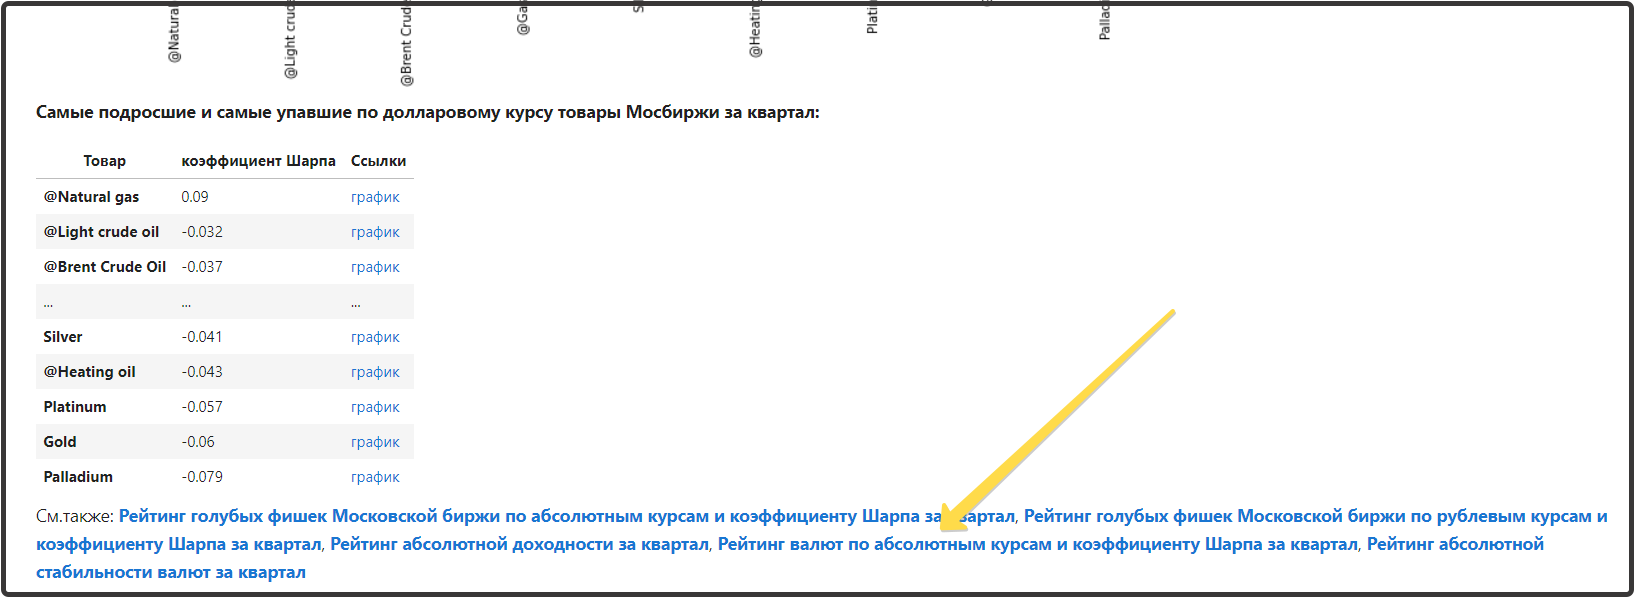

Под описанием вы найдете оглавление всего проекта, которое содержит ссылки на все разделы проекта. Это обеспечивает удобный способ навигации и позволяет вам быстро переходить к различным аспектам и анализу товаров.

Мы уверены, что наша страница с рейтингами товаров Московской биржи по коэффициенту Шарпа предоставит вам ценную информацию и поможет принять обоснованные решения в сфере инвестиций. Мы продолжаем работать над улучшением нашего сервиса, чтобы предоставить вам наилучший опыт в анализе финансовых данных.

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import abscur_menu
import abscur_post as ap

# меню проекта печатаем
abscur_menu.print_menu()

# абсолютные курсы товаров подкачиваем
tov_abs = pd.read_csv("/kaggle/input/mmvb-abscur-tovar/tov_abscur.csv",index_col=0,parse_dates=['Date'])
tov_close = pd.read_csv("/kaggle/input/mmvb-tovar/close_table.csv",index_col=0,parse_dates=['Dates'])

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

cnt = 0
texts = []

for per,title_per in diap:
    display(Markdown("# За " + title_per))
    
    display(Markdown("## За " + title_per + " (абсолютные курсы)"))
    
    date_start = tov_abs.asfreq(freq="D").index[-per]
    date_finish = tov_abs.index[-1]
    
    res = (tov_abs[tov_abs.index >= date_start] / tov_abs[tov_abs.index >= date_start].median()).pct_change()
    res = res.mean()/res.std()
    
    res.sort_values(ascending=False,inplace=True)
    text = "Рейтинг товаров по абсолютным курсам за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d")
    res.plot.bar(grid=True,title=text,ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    texts.append(text)
    plt.savefig(str(cnt) + ".png")
    plt.show()
    cnt += 1
    
    text = "**Самые подросшие и самые упавшие по абсолютному курсу товары Мосбиржи за " + title_per + ":**\n\n"
    text += "|Товар|коэффициент Шарпа|Ссылки|\n"
    text += "|-|-|-|\n"
    for n in range(3):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#" + ticker.replace(" ","-") + ")|\n"
    text += "|...|...|...|\n"
    for n in range(len(res.index)-3,len(res.index)):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#" + ticker.replace(" ","-") + ")|\n"
    display(Markdown(text))
    
    text = "См.также: "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
    display(Markdown("## За " + title_per + " (долларовые курсы)"))
    
    date_start = tov_close.asfreq(freq="D").index[-per]
    date_finish = tov_close.index[-1]
    
    res = (tov_close[tov_close.index >= date_start] / tov_close[tov_close.index >= date_start].median()).pct_change()
    res = res.mean()/res.std()
    
    res.sort_values(ascending=False,inplace=True)
    text = "Рейтинг товаров по долларовым курсам за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d")
    res.plot.bar(grid=True,title=text,ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    texts.append(text)
    plt.savefig(str(cnt) + ".png")
    plt.show()
    cnt += 1
    
    text = "**Самые подросшие и самые упавшие по долларовому курсу товары Мосбиржи за " + title_per + ":**\n\n"
    text += "|Товар|коэффициент Шарпа|Ссылки|\n"
    text += "|-|-|-|\n"
    for n in range(3):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#" + ticker.replace(" ","-") + ")|\n"
    text += "|...|...|...|\n"
    for n in range(len(res.index)-3,len(res.index)):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + str(np.round(res[ticker],3)) + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-tovar/notebook#" + ticker.replace(" ","-") + ")|\n"
    display(Markdown(text))
    
    text = "См.также: "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
    display(Markdown("--- \n"))
#     break
    
num = np.random.randint(cnt)
ap.send_img_and_text(str(num) + ".png",texts[num] + "\n---\nИсточник - https://www.kaggle.com/code/eavprog/abscur-tovar-sharp")